In [1]:
import numpy as np
import matplotlib.pyplot as plt
import bayes_logistic_regression
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)

In [2]:
def create_data_set():
    x = np.random.normal(size=50).reshape(-1, 2)
    y = np.random.normal(size=50).reshape(-1, 2)
    y += np.array([2., 2.])
    return (np.concatenate([x, y]), np.concatenate([np.zeros(25), np.ones(25)]))

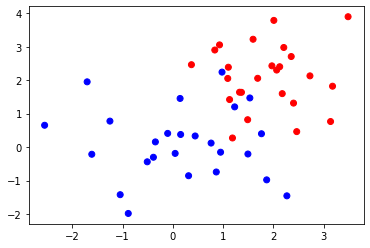

In [3]:
X, t = create_data_set()
colors = ['blue', 'red']
plt.scatter(X[:, 0], X[:, 1], c=[colors[int(label)] for label in t])

(10000,) (10000,)
[ 103.10896316   95.28433488   88.16136008 ...  944.58448283 1002.37283445
 1063.57950517]


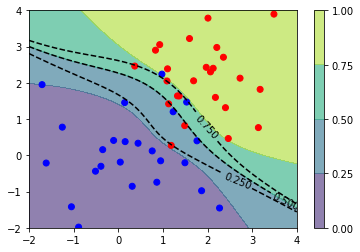

In [4]:
features = PolynomialFeatures(degree=3)

clf = bayes_logistic_regression.BayesianLogisticRegression()
clf.fit(features.fit_transform(X), t)

X_test, Y_test = np.meshgrid(np.linspace(-2, 4, 100), np.linspace(-2, 4, 100))
x_test = np.array([X_test, Y_test]).transpose(1, 2, 0).reshape(-1, 2)

probs = clf.predict_proba(features.transform(x_test))
Probs = probs.reshape(100, 100)

dists = clf.predict_dist(features.transform(x_test))
Dists = dists.reshape(100, 100)

levels = np.linspace(0, 1, 5)
cp = plt.contour(X_test, Y_test, Probs, levels, colors='k', linestyles="dashed")
plt.clabel(cp, inline=True, fontsize=10)

plt.contourf(X_test, Y_test, Dists, levels, alpha=0.6)
plt.colorbar()
plt.xlim(-2, 4)
plt.ylim(-2, 4)
colors = ['blue', 'red']
plt.scatter(X[:, 0], X[:, 1], c=[colors[int(label)] for label in t])